# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

In [17]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import sys

## [Task 1] Implement a Class of Logistic Regression

#### Sigmoid Function

<br />

$$
g(z) = \frac{1}{1+e^{−z}}
$$

In [2]:
# Validate the function

for z in range(-10,11):
    print(1 / (1+math.e**(-z)))

4.539786870243442e-05
0.0001233945759862318
0.00033535013046647827
0.0009110511944006456
0.002472623156634775
0.006692850924284857
0.017986209962091562
0.04742587317756679
0.11920292202211757
0.2689414213699951
0.5
0.7310585786300049
0.8807970779778823
0.9525741268224331
0.9820137900379085
0.9933071490757153
0.9975273768433653
0.9990889488055994
0.9996646498695336
0.9998766054240137
0.9999546021312976


#### Objective Function

<br />

I will implement the objective function of logistic regression, $J$ including a regularization term.

$$
h_\theta(x) = g(\theta^T x)
$$

$$
g(z) = \frac{1}{1+e^{−z}}
$$

$$
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_\theta(x^{(i)})) − (1−y^{(i)}) log(1−h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n\theta^2_j
$$

$m$: the number of data

$h_\theta()$: hypothesis function

$x$: feature vector

$\theta$: parameter vector

$g()$: sigmoid function

$x^{(i)}$: feature vector of ith sample

$y^{(i)}$: correct label of ith sample

$\theta_j$: jth parameter(weight)

$\lambda$: regularization parameter

#### Steepest Descent Method

<br />

I fit datasets by the steepest decsent method. I will use the following equations to update the bias term and the jth parameter.

$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_\theta(x^{(i)}) − y^{(i)})x_j^{(i)},\ \ \ \ \ j = 0
$$

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_\theta(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{\lambda}{m}\theta_j,\ \ \ \ \ j\geq 1
$$

$i$: index of a sample

$j$: index of a feature

### Validate the Class

<br />

I am going to validate the class by using the iris datasets.

In [3]:
# Prepare a dataset for the validation

# Import the dataset
iris = load_iris()

# Split the datasets into explanatory and objective variables
X = iris.data[:,[1,2]]
X = X[iris.target!=1]
y = iris.target[iris.target!=1]

# Split the datasets into train and test dtasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
# Check the dataset

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# Validate the processing of the dataset

X

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.6, 1.4],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.3, 6. ],
       [2.7, 5.1],
       [3. ,

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
print(len(X))
print(len(y))

100
100


In [8]:
# Standardize the dataset

# Initialize the class
scaler = StandardScaler()

# Fit the dataset
scaler.fit(X_train)

# Transfer the datasets
std_X_train = scaler.transform(X_train)

# Fit the dataset
scaler.fit(X_test)

# Transfer the datasets
std_X_test = scaler.transform(X_test)

In [9]:
# Import a class

# Add a path searching for specific modules
sys.path.append("../scratch/model/")

# Import "ScratchLinearRegression"
from scratch_logistic_regression import ScratchLogisticRegression

In [10]:
# Initialize the class
log_reg = ScratchLogisticRegression(num_iter=3000, lr=0.01, reg=0.001, bias=True, verbose=True)

In [11]:
log_reg.fit(std_X_train, y_train, std_X_test, y_test)

0.5713051488866392
0.5765845775387739
0.5697128540068137
0.5750224952462449
0.568126748982334
0.5734666987052738
0.5665468080500641
0.5719171591125386
0.5649730055344493
0.5703738477871406
0.5634053158475483
0.5688367361703826
0.5618437134890598
0.567305795825543
0.5602881730463459
0.5657809984376457
0.5587386691944455
0.5642623158132257
0.5571951766960898
0.5627497198800888
0.5556576704017071
0.5612431826870705
0.5541261252494266
0.5597426764037867
0.5526005162650748
0.5582481733203836
0.5510808185621694
0.5567596458472828
0.5495670073419078
0.5552770665149207
0.54805905789315
0.5538004079734873
0.5465569455924001
0.5523296429926582
0.5450606459037789
0.5508647444613255
0.5435701343789971
0.549405685387322
0.5420853866573208
0.5479524388971468
0.5406063784655334
0.5465049782356814
0.5391330856178949
0.5450632767659074
0.5376654840160957
0.5436273079686181
0.5362035496492064
0.5421970454421284
0.5347472585936247
0.5407724629019806
0.533296587013017
0.5393535341806467
0.5318515111582576

0.34426750396598577
0.33224902525553285
0.34357813178023267
0.33154341413213445
0.34289107897084475
0.3308402021367643
0.34220633554461316
0.33013937914191954
0.3415238915576869
0.3294409350668309
0.34084373711531746
0.32874485987725666
0.3401658623716038
0.32805114358527676
0.33949025752924045
0.327359776249087
0.3388169128392657
0.32667074797279483
0.3381458186008102
0.32598404890621485
0.3374769651608486
0.32529966924466575
0.3368103429139509
0.3246175992287674
0.33614594230203537
0.32393782914423846
0.3354837538141229
0.3232603493216952
0.334823767986092
0.3225851501364505
0.3341659754004361
0.32191222200831326
0.33351036668602035
0.32124155540138927
0.33285693251784076
0.3205731408238822
0.3322056636167845
0.3199069688278951
0.3315565507493907
0.31924303000923265
0.3309095847276129
0.3185813150072046
0.3302647564085824
0.31792181450442886
0.32962205669437283
0.31726451922663634
0.3289814765317664
0.3166094199424756
0.32834300691202045
0.31595650746331844
0.3277066388706349
0.31530

0.21794008318871344
0.2316411548778096
0.2175910485606924
0.23129640101674317
0.21724298173621281
0.2309525781591472
0.21689587914532896
0.23060968291443532
0.21654973723380302
0.230267711907009
0.21620455246302797
0.22992666177618193
0.2158603213099521
0.2295865291761043
0.21551704026700289
0.2292473107756888
0.21517470584201154
0.22890900325853594
0.21483331455813862
0.22857160332286022
0.21449286295379877
0.2282351076814167
0.21415334758258722
0.22789951306142797
0.21381476501320498
0.22756481620451155
0.21347711182938647
0.2272310138666072
0.21314038462982557
0.22689810281790543
0.21280458002810326
0.22656607984277607
0.2124696946526151
0.22623494173969683
0.21213572514649956
0.22590468532118257
0.21180266816756574
0.2255753074137154
0.21147052038822284
0.22524680485767432
0.21113927849540864
0.22491917450726584
0.21080893919051913
0.22459241323045487
0.21047949918933853
0.22426651790889562
0.210150955221969
0.22394148543786338
0.20982330403276153
0.22361731272618662
0.209496542380

0.17305106284651717
0.1588442032668551
0.17285080593069432
0.1586450220433055
0.17265099148555987
0.15844629342213526
0.17245161815465182
0.15824801598899843
0.17225268458669107
0.1580501883350237
0.1720541894355573
0.1578528090567896
0.17185613136026698
0.15765587675630008
0.1716585090249492
0.15745939004096
0.17146132109882326
0.15726334752355087
0.17126456625617625
0.15706774782220667
0.17106824317633954
0.1568725895603899
0.17087235054366692
0.15667787136686753
0.17067688704751183
0.1564835918756871
0.17048185138220504
0.1562897497261534
0.17028724224703243
0.1560963435628042
0.1700930583462129
0.15590337203538773
0.16989929838887646
0.15571083379883852
0.16970596108904218
0.15551872751325455
0.1695130451655965
0.15532705184387408
0.1693205493422715
0.15513580546105266
0.1691284723476234
0.1549449870402404
0.16893681291501106
0.15475459526195864
0.16874556978257463
0.15456462881177815
0.16855474169321435
0.15437508638029585
0.16836432739456933
0.15418596666311274
0.1681743256389967

0.11473059651440837
0.1282375233353477
0.11462150567932045
0.12812617507375226
0.11451261050820472
0.1280150207435216
0.11440391050687415
0.12790405986456682
0.11429540518272088
0.1277932919583079
0.11418709404471003
0.12768271654766805
0.11407897660337345
0.12757233315706792
0.11397105237080427
0.12746214131241998
0.11386332086065039
0.12735214054112304
0.11375578158810906
0.12724233037205646
0.11364843406992049
0.12713271033557486
0.11354127782436235
0.12702327996350235
0.1134343123712438
0.12691403878912713
0.11332753723189955
0.12680498634719595
0.11322095192918417
0.12669612217390874
0.11311455598746645
0.12658744580691303
0.11300834893262332
0.1264789567852987
0.11290233029203443
0.1263706546495923
0.1127964995945762
0.12626253894175213
0.11269085637061643
0.1261546092051625
0.1125854001520084
0.12604686498462847
0.11248013047208544
0.12593930582637086
0.1123750468656551
0.12583193127802042
0.11227014886899378
0.12572474088861324
0.11216543601984116
0.1256177342085849
0.112060907

0.09418042618428991
0.10715144870551861
0.09410557009023629
0.10707419908610251
0.09403082871252025
0.10699706436884932
0.09395620180038756
0.10692004430751009
0.0938816891037828
0.10684313865651172
0.09380729037334702
0.10676634717095469
0.09373300536041551
0.1066896696066105
0.09365883381701537
0.10661310571991997
0.09358477549586328
0.10653665526799053
0.09351083015036309
0.10646031800859443
0.09343699753460366
0.10638409370016626
0.09336327740335634
0.10630798210180088
0.09328966951207299
0.10623198297325126
0.09321617361688332
0.10615609607492621
0.09314278947459309
0.10608032116788829
0.09306951684268137
0.10600465801385169
0.09299635547929873
0.10592910637518001
0.09292330514326469
0.10585366601488419
0.09285036559406556
0.10577833669662029
0.09277753659185232
0.10570311818468747
0.09270481789743833
0.10562801024402584
0.0926322092722971
0.1055530126402143
0.09255971047856013
0.10547812513946857
0.09248732127901481
0.10540334750863892
0.09241504143710201
0.1053286795152083
0.092

0.07704273261809766
0.08936702129359385
0.07699211853295716
0.0893141776594548
0.07694156983990895
0.08926140025012244
0.07689108641683925
0.0892086889443694
0.0768406681419272
0.08915604362125466
0.07679031489364398
0.08910346416012312
0.07674002655075207
0.0890509504406043
0.07668980299230448
0.08899850234261193
0.0766396440976435
0.08894611974634278
0.07658954974640039
0.08889380253227623
0.07653951981849426
0.08884155058117321
0.07648955419413109
0.08878936377407545
0.07643965275380332
0.0887372419923046
0.07638981537828864
0.08868518511746157
0.07634004194864932
0.08863319303142575
0.07629033234623148
0.08858126561635395
0.07624068645266399
0.08852940275468005
0.07619110414985801
0.08847760432911365
0.07614158532000588
0.08842587022263991
0.07609212984558045
0.08837420031851816
0.07604273760933428
0.08832259450028163
0.07599340849429873
0.08827105265173624
0.07594414238378326
0.08821957465696022
0.0758949391613747
0.08816816040030308
0.0758457987109362
0.08811680976638481
0.075796

0.07906728594829249
0.06717782525942483
0.0790266152357471
0.06713923089803182
0.07898598961759475
0.06710068064457439
0.07894540902013734
0.06706217442553264
0.07890487336983318
0.06702371216754506
0.07886438259329638
0.06698529379740811
0.07882393661729686
0.06694691924207573
0.07878353536875966
0.06690858842865889
0.07874317877476457
0.0668703012844253
0.07870286676254579
0.06683205773679896
0.07866259925949154
0.06679385771335966
0.07862237619314356
0.06675570114184269
0.07858219749119683
0.06671758795013844
0.07854206308149916
0.06667951806629185
0.07850197289205074
0.06664149141850213
0.07846192685100369
0.06660350793512243
0.07842192488666189
0.06656556754465923
0.0783819669274804
0.06652767017577206
0.07834205290206517
0.0664898157572732
0.07830218273917251
0.066452004218127
0.07826235636770883
0.06641423548744992
0.07822257371673032
0.06637650949450961
0.07818283471544234
0.06633882616872497
0.07814313929319924
0.0663011854396655
0.07810348737950398
0.066263587237051
0.0780638

0.055264439501830555
0.06641394880359057
0.05523833742697506
0.0663861425386255
0.05521226019665224
0.06635836192623988
0.055186207775962094
0.06633060693112144
0.055160180130068695
0.0663028775180217
0.05513417722419974
0.06627517365175552
0.055108199023646616
0.06624749529720124
0.05508224549376416
0.06621984241930039
0.05505631659997061
0.06619221498305762
0.055030412307747315
0.06616461295354048
0.055004532582638675
0.06613703629587932
0.054978677390252105
0.06610948497526731
0.05495284669625777
0.06608195895696001
0.054927040466388376
0.0660544582062754
0.0549012586664392
0.06602698268859374
0.05487550126226786
0.06599953236935745
0.054849768219794176
0.06597210721407085
0.054824059505000085
0.06594470718830026
0.05479837508392942
0.06591733225767352
0.05477271492268789
0.0658899823878802
0.05474707898744274
0.0658626575446713
0.054721467244422874
0.06583535769385902
0.054695879659918505
0.06580808280131688
0.05467031620028115
0.06578083283297934
0.05464477683192338
0.065753607754

0.04699611103553338
0.05756238407277324
0.04697730813427943
0.05754214896234236
0.04695852051088664
0.05752192978021916
0.046939748146884466
0.05750172650752611
0.04692099102383181
0.05748153912541511
0.04690224912331674
0.05746136761506752
0.046883522426956564
0.05744121195769407
0.0468648109163978
0.05742107213453483
0.04684611457331593
0.05740094812685909
0.04682743337941562
0.05738083991596542
0.04680876731643041
0.05736074748318148
0.046790116366122854
0.05734067080986413
0.04677148051028427
0.057320609877399085
0.04675285973073485
0.057300564667201306
0.04673425400932359
0.057280535160714394
0.04671566332792808
0.05726052133941106
0.04669708766845464
0.05724052318479279
0.046678527012838124
0.05722054067838974
0.04665998134304196
0.05720057380176085
0.04664145064105802
0.05718062253649368
0.046622934888906675
0.05716068686420446
0.04660443406863656
0.057140766766537926
0.046585948162324704
0.057120862225167185
0.04656747715207632
0.057100973221794055
0.04654902102002492
0.0570810

0.04293006577523651
0.053174227729446896
0.042914424805067915
0.05315729773679624
0.042898795445069596
0.05314037991372015
0.042883177682371015
0.05312347424698903
0.04286757150412039
0.05310658072339214
0.04285197689748473
0.05308969932973803
0.04283639384964983
0.05307283005285388
0.042820822347820135
0.05305597287958603
0.042805262379218736
0.053039127796799576
0.04278971393108746
0.05302229479137859
0.0427741769906866
0.05300547385022586
0.04275865154529516
0.05298866496026304
0.04274313758221059
0.052971868108430485
0.04272763508874886
0.05295508328168728
0.04271214405224445
0.05293831046701131
0.042696664460050236
0.05292154965139892
0.04268119629953751
0.05290480082186522
0.042665739558095925
0.052888063965443925
0.04265029422313348
0.05287133906918724
0.042634860282076505
0.052854626120165955
0.04261943772236954
0.05283792510546928
0.04260402653147544
0.05282123601220495
0.042588626696875236
0.05280455882749912
0.04257323820606808
0.05278789353849627
0.04255786104657139
0.05277

0.03997651707906764
0.0499699988930892
0.03996299277931785
0.04995529207234428
0.039949477820601695
0.0499405950836904
0.03993597219326034
0.049925907917154635
0.03992247588764807
0.04991123056277732
0.039908988894132434
0.049896563010612176
0.03989551120309406
0.04988190525072645
0.03988204280492673
0.04986725727320053
0.03986858369003735
0.049852619068128365
0.03985513384884594
0.049837990625617036
0.0398416932717855
0.04982337193578688
0.03982826194930214
0.04980876298877169
0.039814839871854996
0.049794163774718334
0.039801427029916195
0.04977957428378699
0.03978802341397083
0.049764994506150954
0.03977462901451695
0.049750424431996725
0.03976124382206554
0.04973586405152399
0.03974786782714054
0.04972131335494553
0.039734501020278694
0.04970677233248719
0.039721143392029715
0.04969224097438809
0.03970779493295607
0.04967771927090016
0.039694455633633156
0.04966320721228854
0.03968112548464908
0.04964870478883135
0.03966780447660481
0.049634211990819625
0.03965449260011401
0.049619

In [12]:
log_reg.predict_proba(std_X_test)

array([[0.99224718, 0.99554261, 0.99179136, 0.15382087, 0.04914751,
        0.07053239, 0.01959008, 0.99847454, 0.0336947 , 0.04738337,
        0.03595271, 0.16277296, 0.99171272, 0.00803931, 0.99253713,
        0.03696419, 0.9874116 , 0.98213899, 0.15382087, 0.07053239]])

In [13]:
log_reg.predict(std_X_test)

[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]

# Validation

## [Task 2] Plot Learning Curves

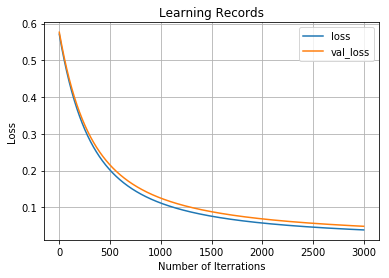

In [14]:
log_reg.plot_learning_record()

## [Task 3] Compute Index Values

In [15]:
log_reg.compute_index_values(std_X_test, y_test)

accuracy score:  1.0
precision score:  1.0
recall score:  1.0
f1 score:  1.0
confusion matrix:
[[12  0]
 [ 0  8]]


## [Task 4] Visualize Decision Boundary

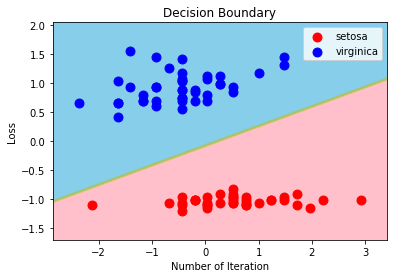

In [16]:
log_reg.decision_boundary(std_X_train, y_train)

## [Task 5] Save Weights

## [Task 6] Discuss about Classification and Regression

    - Classification is to classify given data into any labels.
    
    - On the other hand, regression is to predict values actually.